In [67]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [68]:
def exponential(l):
    u = random.random()
    return -math.log(u)/l

In [69]:
lambda_a = 6
lambda_d = 5
n_of_tasks=100

In [70]:
tasks=[]
for i in range(n_of_tasks):
    tasks.append(exponential(lambda_a))

In [71]:
task_id=0
task_t=tasks[task_id]
t=0
tasks_remaining={}
tasks_remaining[task_id] = exponential(lambda_d) 
 
executed=0
time_waited={}
time_waited[task_id]=0
executed_tasks=[]
tasks_in_system=[]
tasks_in_system.append([t,len(tasks_remaining.keys())])

while(executed<n_of_tasks):
    if(task_t<=0 and task_id<n_of_tasks-1):
        task_id+=1
        task_t=tasks[task_id]
        serwer_t=exponential(lambda_d)
        tasks_remaining[task_id]=serwer_t
        time_waited[task_id]=t
        tasks_in_system.append([t,len(tasks_remaining.keys())])
    remaining = len(tasks_remaining.keys())
    if(remaining>0):
        serwer_step = 1/remaining
        for task in list(tasks_remaining.keys()):
            tasks_remaining[task]-=serwer_step/3600
            if(tasks_remaining[task]<=0):
                executed+=1
                executed_tasks.append([t,executed])
                del tasks_remaining[task]
                time_waited[task_id]=t-time_waited[task_id]
                tasks_in_system.append([t,len(tasks_remaining.keys())])
    task_t-=1/3600
    t+=1/3600

In [72]:
task_id=0
task_t=tasks[task_id]
t=0
queue=[]
queue.append(t)
serwer_t=exponential(lambda_d)  
executed=0
tasks_in_queue=[]
time_waited_original=[]
executed_tasks_original=[]
tasks_in_queue.append([t,len(queue)])

while(executed<n_of_tasks):
    if(task_t<=0 and task_id<n_of_tasks-1):
        queue.append(t)
        tasks_in_queue.append([t,len(queue)])
        task_id+=1
        task_t=tasks[task_id]
    if(len(queue)>0):
        if(serwer_t<=0):
            serwer_t=exponential(lambda_d)
            temp = queue.pop(0)
            #print(executed)
            executed+=1
            time_waited_original.append(t-temp)
            tasks_in_queue.append([t,len(queue)])
            executed_tasks_original.append([t,executed])
        serwer_t-=1/3600
        #print(serwer_t)
    task_t-=1/3600
    t+=1/3600

In [73]:
plt.rcParams['figure.figsize'] = [25, 8]

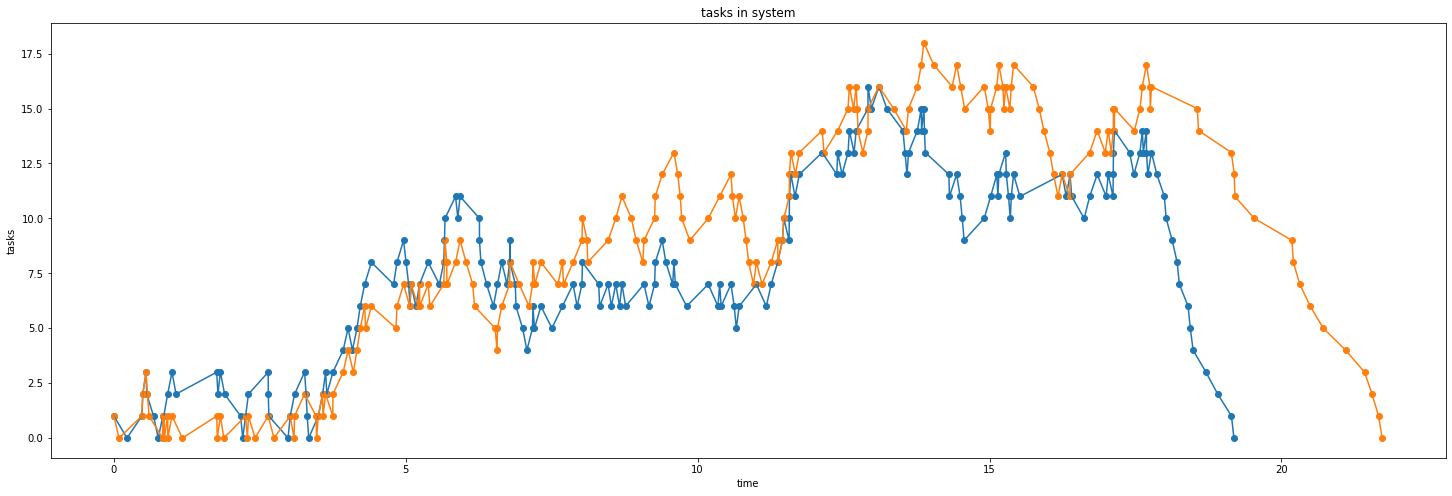

In [74]:
plt.title("tasks in system")
plt.xlabel("time")
plt.ylabel("tasks")
#plt.rcParams['figure.figsize'] = [10, 10]
plt.plot([x[0] for x in tasks_in_system], [x[1] for x in tasks_in_system])
plt.scatter([x[0] for x in tasks_in_system], [x[1] for x in tasks_in_system])
plt.plot([x[0] for x in tasks_in_queue], [x[1] for x in tasks_in_queue])
plt.scatter([x[0] for x in tasks_in_queue], [x[1] for x in tasks_in_queue])

<BarContainer object of 100 artists>

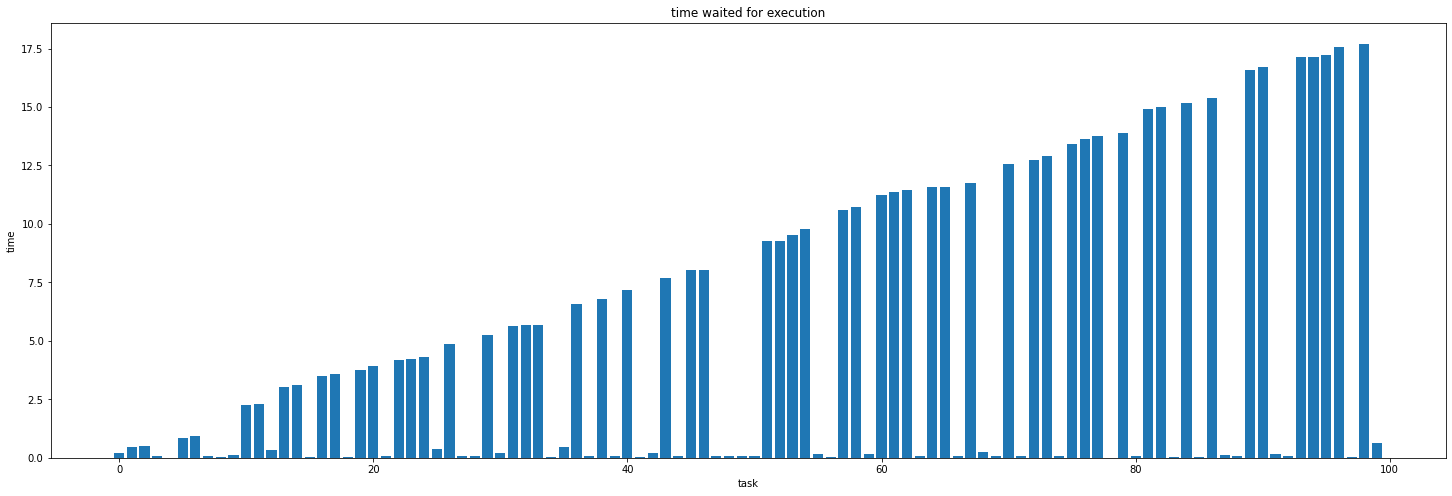

In [75]:
plt.title("time waited for execution")
plt.xlabel("task")
plt.ylabel("time")

plt.bar(time_waited.keys(),time_waited.values())

<BarContainer object of 100 artists>

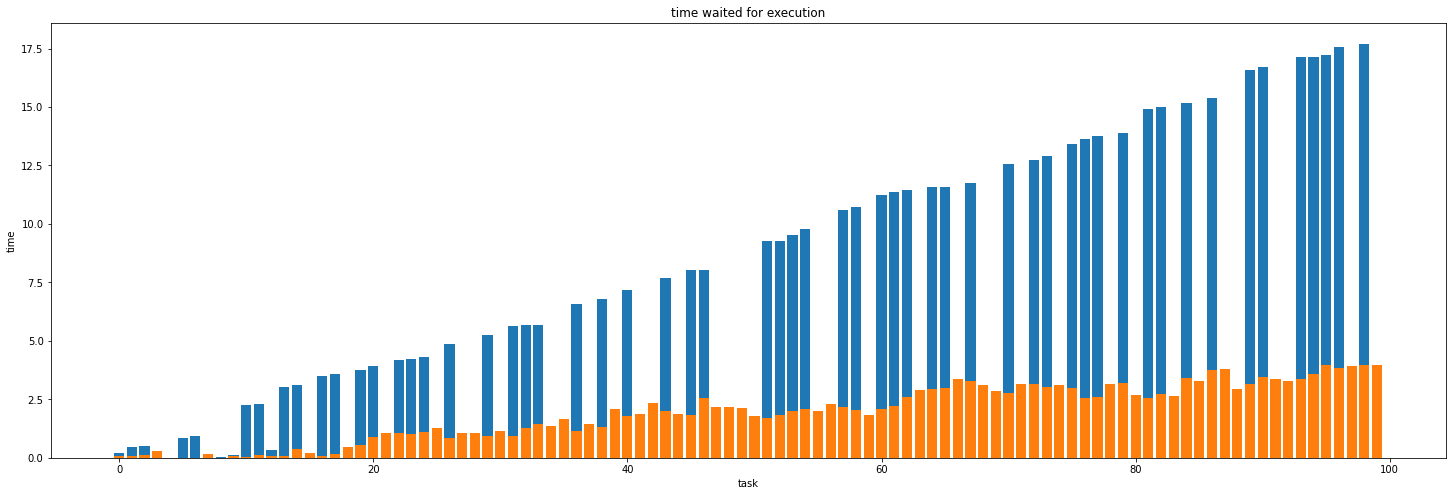

In [76]:
plt.title("time waited for execution")
plt.xlabel("task")
plt.ylabel("time")
plt.bar(time_waited.keys(),time_waited.values())
plt.bar(range(n_of_tasks),time_waited_original)

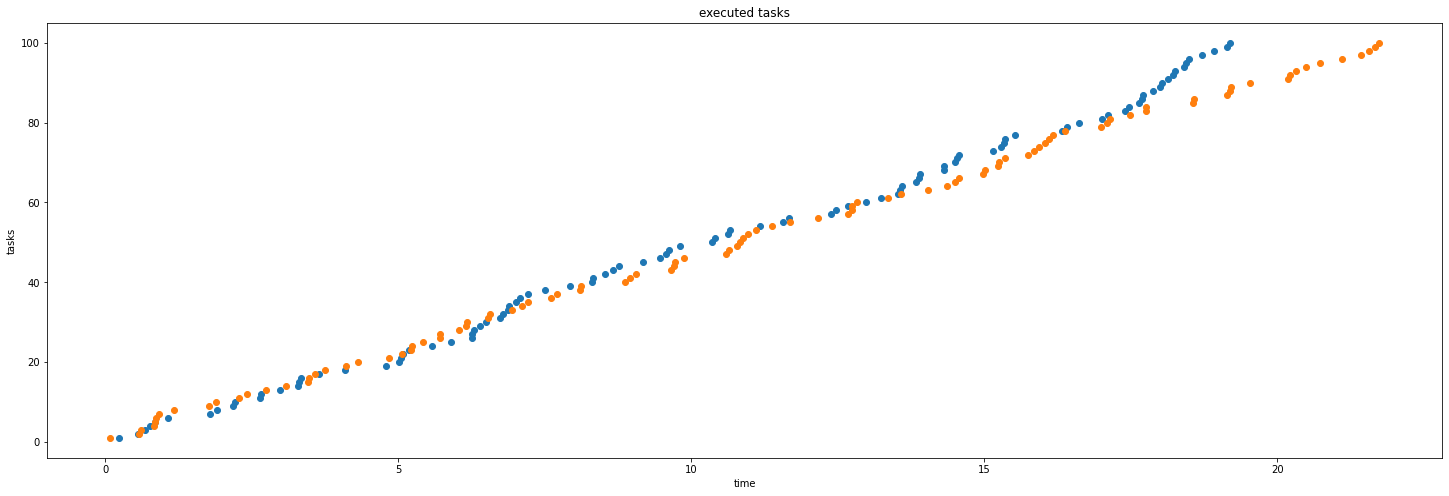

In [77]:
plt.title("executed tasks")
plt.xlabel("time")
plt.ylabel("tasks")
plt.scatter([x[0] for x in executed_tasks], [x[1] for x in executed_tasks])
plt.scatter([x[0] for x in executed_tasks_original], [x[1] for x in executed_tasks_original])